In [71]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc



DATASET COLUMNS FEATURE EXPLAIN

Age (age in years)
Sex (1 = male; 0 = female)
CP (chest pain type)
TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
CHOL (serum cholestoral in mg/dl)
FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
RESTECH (resting electrocardiographic results)
THALACH (maximum heart rate achieved)
EXANG (exercise induced angina (1 = yes; 0 = no))
OLDPEAK (ST depression induced by exercise relative to rest)
SLOPE (the slope of the peak exercise ST segment)
CA (number of major vessels (0-3) colored by flourosopy)
THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
TARGET (1 or 0)

In [8]:
location = "datasets/heart.csv"
df = pd.read_csv(location)

In [9]:
#df.head
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [12]:
df['sex']=df['sex'].map({0:"female",1:"male"})




In [13]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
#show the number of rows and columns in a dataframe
df.shape

(303, 14)

In [15]:
#show the column names in the dataset
df.columns
#or print(df.columns)

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [16]:
#show the data type of each column
df.dtypes

age                          int64
sex                         object
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

In [17]:
#number of non-NA values
#len(df) would count rows including NA values
df.count()

age                        303
sex                        303
chest_pain_type            303
resting_blood_pressure     303
cholesterol                303
fasting_blood_sugar        303
rest_ecg                   303
max_heart_rate_achieved    303
exercise_induced_angina    303
st_depression              303
st_slope                   303
num_major_vessels          303
thalassemia                303
target                     303
dtype: int64

In [18]:
#descriptive statistics
df.describe()

,age,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
#doesn't do anything on its own
df.groupby('sex')

In [20]:
#add a stats or math function to it
df['chest_pain_type'].groupby(df['sex'])
#mean of multiple columns
#df[['hours', 'exercise']].groupby(df['gender']).mean()

In [21]:
#use two columns to groupby
df.groupby(['sex', 'age']).mean()

chest_pain_type  resting_blood_pressure  cholesterol  \
sex    age                                                         
female 34          1.000000              118.000000   210.000000   
       35          0.000000              138.000000   183.000000   
       37          2.000000              120.000000   215.000000   
       39          2.000000              116.000000   209.500000   
       41          1.250000              118.250000   244.000000   
       42          1.000000              111.000000   237.000000   
       43          1.000000              127.000000   277.000000   
       44          2.000000              113.000000   191.500000   
       45          0.666667              126.666667   210.000000   
       46          1.000000              128.333333   208.000000   
       48          2.000000              130.000000   275.000000   
       49          0.500000              132.000000   270.000000   
       50          1.000000              116.666667   239.000000   
       51          1.500000              130.000000   291.000000   
       52          2.000000              136.000000   196.000000   
       53          0.666667              132.000000   238.000000   
       54          1.800000              129.000000   254.800000   
       55          0.500000              143.750000   281.000000   
       56          0.333333              158.000000   330.333333   
       57          0.250000              129.500000   283.500000   
       58          1.000000              134.333333   268.666667   
       59          0.000000              174.000000   249.000000   
       60          1.750000              130.500000   248.500000   
       61          0.000000              137.500000   318.500000   
       62          0.285714              140.285714   262.285714   
       63          0.600000              131.400000   264.000000   
       64          0.666667              150.000000   313.666667   
       65          1.500000              151.250000   317.750000   
       66          1.666667              158.000000   244.000000   
       67          1.333333              124.333333   354.666667   
...                     ...                     ...          ...   
male   42          1.333333              132.333333   250.000000   
       43          0.333333              126.166667   250.000000   
       44          1.000000              122.444444   228.000000   
       45          0.800000              119.800000   269.800000   
       46          0.750000              127.750000   247.000000   
       47          1.200000              119.600000   246.400000   
       48          0.666667              123.333333   246.833333   
       49          1.666667              122.666667   201.000000   
       50          1.000000              140.750000   218.000000   
       51          1.375000              121.750000   242.500000   
       52          1.083333              130.250000   230.916667   
       53          0.800000              133.000000   230.800000   
       54          0.727273              129.181818   252.636364   
       55          0.250000              140.500000   280.250000   
       56          1.000000              125.875000   232.750000   
       57          0.615385              138.076923   224.692308   
       58          0.769231              125.000000   248.000000   
       59          1.307692              147.307692   239.153846   
       60          0.285714              132.428571   243.857143   
       61          0.833333              138.333333   218.833333   
       62          1.000000              124.500000   246.750000   
       63          0.750000              136.250000   251.000000   
       64          1.428571              134.000000   257.571429   
       65          0.750000              125.750000   240.250000   
       66          0.250000              138.000000   247.000000   
       67          0.333333              129.500000   252.833333   


In [22]:
#pivot table default function is mean
pd.pivot_table(df, index=['sex'])

,age,chest_pain_type,cholesterol,exercise_induced_angina,fasting_blood_sugar,max_heart_rate_achieved,num_major_vessels,rest_ecg,resting_blood_pressure,st_depression,st_slope,target,thalassemia
sex,,,,,,,,,,,,,
female,55.677083,1.041667,261.302083,0.229167,0.12500,151.125000,0.552083,0.572917,133.083333,0.876042,1.427083,0.750000,2.125000
male,53.758454,0.932367,239.289855,0.371981,0.15942,148.961353,0.811594,0.507246,130.946860,1.115459,1.386473,0.449275,2.400966


In [23]:
#unique values in a column
df['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [24]:
#find missing values
filename = "datasets/heart.csv"
df_missing = pd.read_csv(filename)

#df.head()

In [25]:
#total missing values
df_missing.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
#show rows with missing values
missing = df_missing['chol'].isnull()
#missing will only show True/False values
df_missing.loc[missing]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [27]:
#replace empty cells with 0
df.fillna(0)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,male,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,female,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,male,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,male,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,male,2,150,168,0,1,174,0,1.6,2,0,2,1


Age Aanalysis

In [28]:
df['age'].value_counts()[:10]
#data age show value counts for age least 10

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

In [29]:
#firstly find min and max ages
minAge=min(df['age'])
maxAge=max(df['age'])
meanAge=df['age'].mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


In [30]:
young_ages=df[(df['age']>=29)&(df['age']<40)]
middle_ages=df[(df['age']>=40)&(df['age']<55)]
elderly_ages=df[(df['age']>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


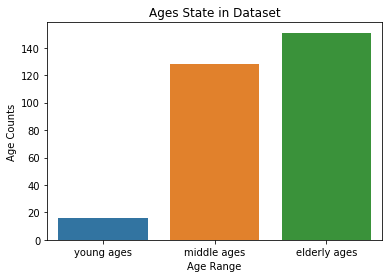

In [31]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

In [78]:
df['AgeRange']=0
youngAge_index=df[(df['age']>=29)&(df['age']<40)].index
middleAge_index=df[(df['age']>=40)&(df['age']<55)].index
elderlyAge_index=df[(df['age']>55)].index

In [79]:
for index in elderlyAge_index:
    df.loc[index,'AgeRange']=2
    
for index in middleAge_index:
    df.loc[index,'AgeRange']=1

for index in youngAge_index:
    df.loc[index,'AgeRange']=0

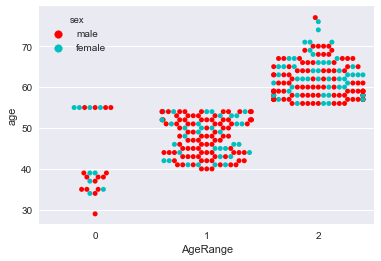

In [80]:
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="AgeRange", y="age",hue='sex',
              palette=["r", "c", "y"], data=df)
plt.show()

Gender Analysis

In [81]:
df.sex.value_counts()

male      207
female     96
Name: sex, dtype: int64

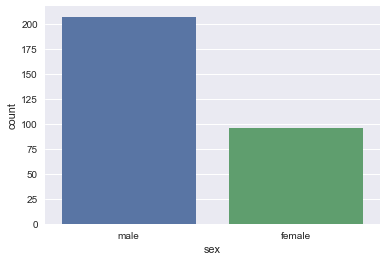

In [82]:
#Sex (1 = male; 0 = female)
sns.countplot(df.sex)
plt.show()

Chest Pain Type Analysis


In [83]:
#As seen, there are 4 types of chest pain.
df.chest_pain_type.value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain_type, dtype: int64

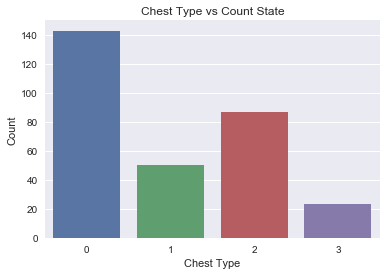

In [84]:
sns.countplot(df.chest_pain_type)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition too bad

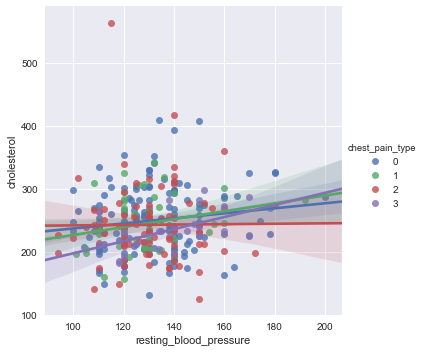

In [85]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="resting_blood_pressure", y="cholesterol",data=df,hue="chest_pain_type")
plt.show()


As a result of the above analyzes, it can be seen that 0 cases with chest pain are less common with heart disease.
But on the other hand, there are problems in all cases of chest pain, such as 1,2,3.

Thalach Analysis

The analysis of the system we discussed in the case of maximum heart rate is shown.

THALACH (maximum heart rate achieved)

In [87]:
df.max_heart_rate_achieved.value_counts()[:20]
#First show 20 rows

162    11
160     9
163     9
173     8
152     8
125     7
132     7
150     7
172     7
143     7
144     7
156     6
169     6
158     6
140     6
142     6
178     5
161     5
154     5
165     5
Name: max_heart_rate_achieved, dtype: int64

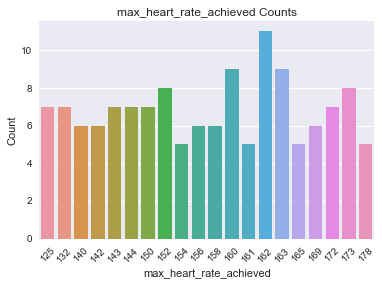

In [88]:
sns.barplot(x=df.max_heart_rate_achieved.value_counts()[:20].index,y=df.max_heart_rate_achieved.value_counts()[:20].values)
plt.xlabel('max_heart_rate_achieved')
plt.ylabel('Count')
plt.title('max_heart_rate_achieved Counts')
plt.xticks(rotation=45)
plt.show()


In the analysis system, which will be carried out now, an analysis shall be carried out for all persons or their status in the target process.



Thal Analysis(thalassemia)

3 = normal; 6 = fixed defect; 7 = reversable defect

In [89]:
df.thalassemia.value_counts()

2    166
3    117
1     18
0      2
Name: thalassemia, dtype: int64

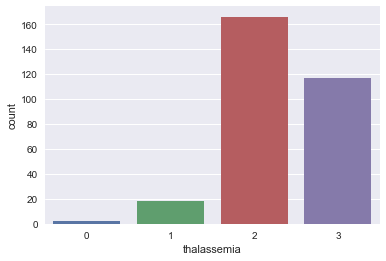

In [90]:
sns.countplot(df.thalassemia)
plt.show()


According to the analysis, Thal values are observed. Of these values, 0 is only 2. 1 showed a distribution of 18. In order to better understand this distribution, we need to take a look at the data set.

In [91]:
df[(df.thalassemia==0)]
#as seen, only 50% was understood to be 50% target.

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,AgeRange
48,53,female,2,128,216,0,0,115,0,0.0,2,0,0,1,1
281,52,male,0,128,204,1,1,156,1,1.0,1,0,0,0,1


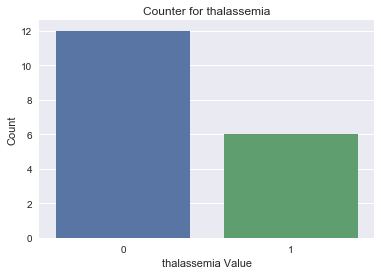

In [92]:
df[(df['thalassemia']==1)].target.value_counts()
sns.barplot(x=df[(df['thalassemia']==1)].target.value_counts().index,y=df[(df['thalassemia']==1)].target.value_counts().values)
plt.xlabel('thalassemia Value')
plt.ylabel('Count')
plt.title('Counter for thalassemia')
plt.show()



Target Analysis

We will analyze this feature for people who are sick or not.

In [93]:
df.target.unique()
#only two values are shown.
#A value of 1 is the value of patient 0.

array([1, 0], dtype=int64)

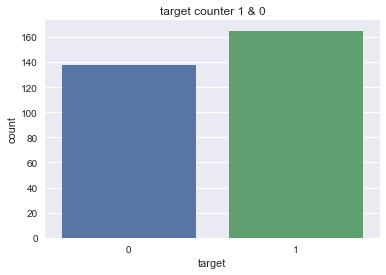

In [94]:
sns.countplot(df.target)
plt.xlabel('target')
plt.ylabel('count')
plt.title('target counter 1 & 0')
plt.show()

In [95]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,AgeRange
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1,2


In [96]:
#determine the age ranges of patients with and without sickness and make analyzes about them
age_counter_target_1=[]
age_counter_target_0=[]
for age in df.age.unique():
    age_counter_target_1.append(len(df[(df['age']==age)&(df.target==1)]))
    age_counter_target_0.append(len(df[(df['age']==age)&(df.target==0)]))
#now, draw show on graph   

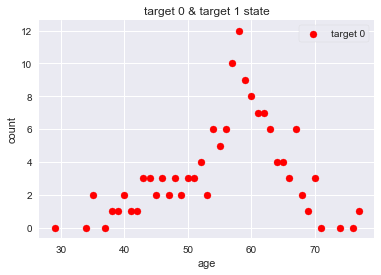

In [97]:
#Target 1 & 0 show graph on scatter
plt.scatter(x=df.age.unique(),y=age_counter_target_0,color='red',label='target 0')
plt.legend(loc='upper right',frameon=True)
plt.xlabel('age')
plt.ylabel('count')
plt.title('target 0 & target 1 state')
plt.show()

In [98]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,AgeRange
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1,2


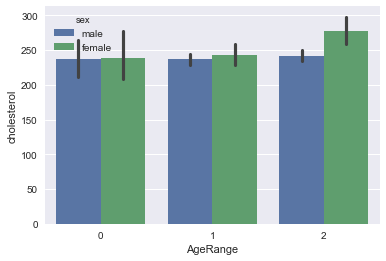

In [101]:
g = sns.barplot(x="AgeRange", y="cholesterol",
                 hue="sex",
                 data=df)
plt.show()

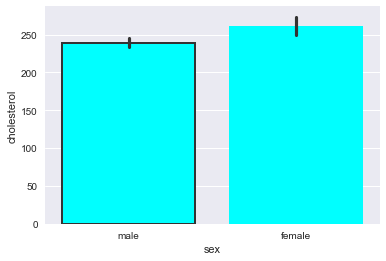

In [116]:
ax = sns.barplot("sex", "cholesterol", data=df,
                  linewidth=2, facecolor=(0, 1, 1, 1),
                  errcolor=".2", edgecolor=".2")
plt.show()

In [122]:
male_young_t_0=df[(df['sex']==0)&(df['AgeRange']==0)&(df['target']==0)]
male_middle_t_1=df[(df['sex']==1)&(df['AgeRange']==1)&(df['target']==1)]
male_elderly_t_2=df[(df['sex']==2)&(df['AgeRange']==2)&(df['target']==2)]
print(len(male_young_t_0))
print(len(male_middle_t_1))
print(len(male_elderly_t_2))

0
0
0


ValueError: min() arg is an empty sequence

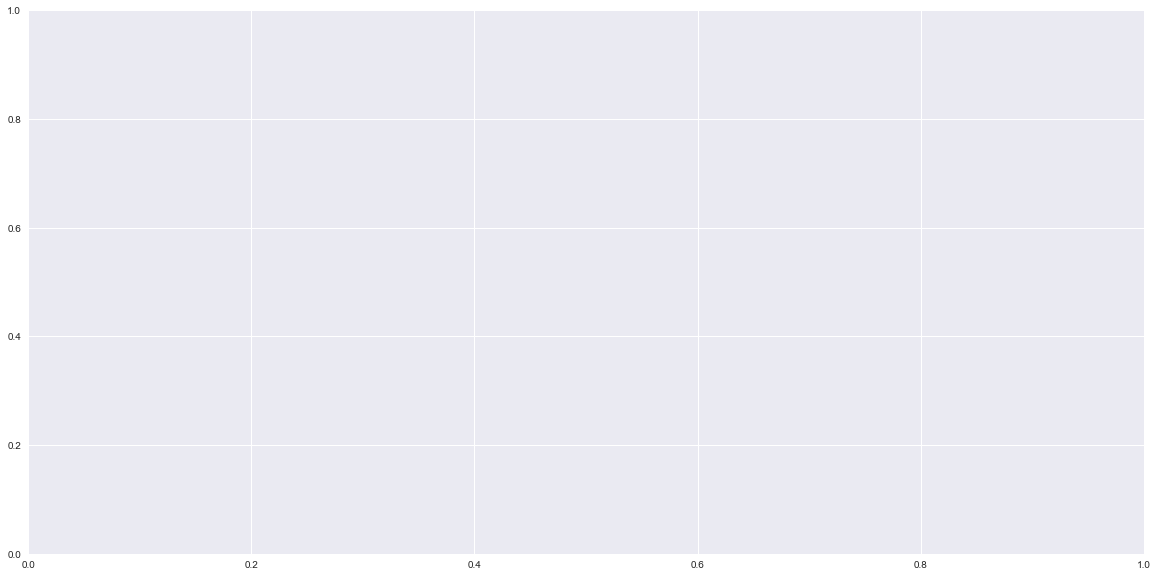

In [128]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x=np.arange(len(male_young_t_1)),y=male_young_t_1.resting_blood_pressure,color='lime',alpha=1,label='Young')
sns.pointplot(x=np.arange(len(male_middle_t_1)),y=male_middle_t_1.resting_blood_pressure,color='black',alpha=1,label='Middle')
sns.pointplot(x=np.arange(len(male_elderly_t_1)),y=male_elderly_t_1.resting_blood_pressure,color='red',alpha=1,label='Elderly')
plt.xlabel('AgeRange',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.legend(loc='upper right',frameon=True)
plt.ylabel('resting_blood_pressure',fontsize = 15,color='blue')
plt.title('Age Range Values vs resting_blood_pressure',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [130]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,AgeRange
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1,2


In [132]:
df_filter_mean=df[(df['target']==1)&(df['age']>50)].groupby('sex')[['resting_blood_pressure','cholesterol','thalassemia']].mean()

In [133]:
df_filter_mean.unstack()

                        sex   
resting_blood_pressure  female    132.804348
                        male      132.396226
cholesterol             female    274.500000
                        male      230.132075
thalassemia             female      2.000000
                        male        2.301887
dtype: float64


It seems that old people have a very hard job because their values are very high.

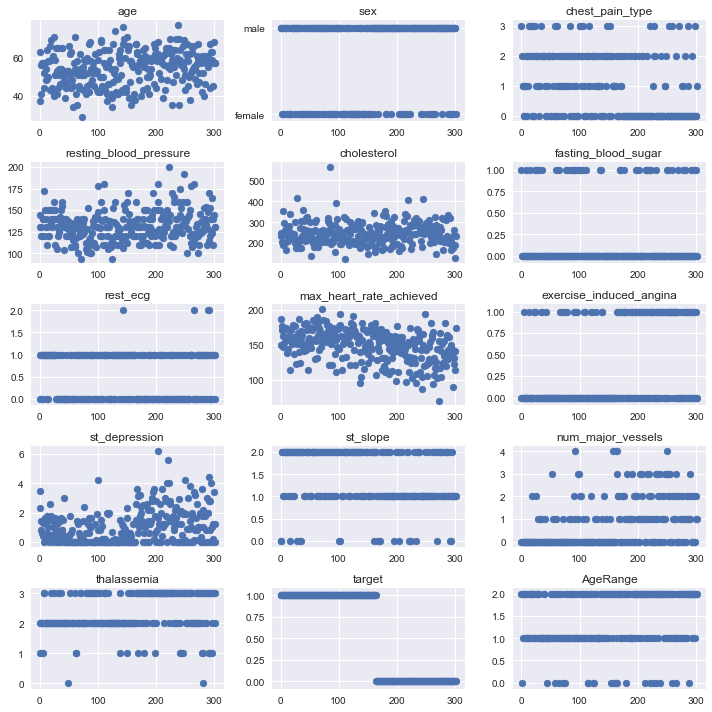

In [134]:
for i,col in enumerate(df.columns.values):
    plt.subplot(5,3,i+1)
    plt.scatter([i for i in range(303)],df[col].values.tolist())
    plt.title(col)
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(10,10)
    plt.tight_layout()
plt.show()

MODEL, TRAINING and TESTING


In [146]:
#Let's see how the correlation values between them
df.corr()

,age,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,AgeRange
age,1.000000,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,0.808707
chest_pain_type,-0.068653,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798,-0.079877
resting_blood_pressure,0.279351,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,0.214313
cholesterol,0.213678,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,0.138688
fasting_blood_sugar,0.121308,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,0.133788
rest_ecg,-0.116211,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,-0.179119
max_heart_rate_achieved,-0.398522,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,-0.306015
exercise_induced_angina,0.096801,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,0.072205
st_depression,0.210013,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,0.155264
st_slope,-0.168814,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877,-0.149919



All correlation values between the data are listed in the previous sections. As a result of this listing, it is aimed to ensure that these properties are used in different places by performing different operations. Thus, the p-value process determines a hypothesis and a hypothesis thesis is presented between each characteristic according to this hypothesis. In this process, after determining the Class property as hypothesis, the relations between all the other properties are checked. This results in a different number for each property. What is important here is that these numbers are not close to 1.00. If the number is close to 1.00 this is very bad.

In [149]:
import statsmodels.formula.api as smf

X=np.append(arr=np.ones((303,1)).astype(int),values=df,axis=1)

X_l=df.iloc[:,[0,1,2,3,4,5,6]].values
r=sm.OLS(endog=df.iloc[:,-1:],exog=X_l).fit()
print(r.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [151]:
dfX=df.drop('target',axis=1)
dfY=df['target']

In [152]:
X_train,X_test,y_train,y_test=train_test_split(dfX,dfY,test_size=0.2,random_state=42)

In [153]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (242, 14)
X_test (61, 14)
y_train (242,)
y_test (61,)


The difference in value between our data is too big. It increases both the volume and the results are very bad. To reduce this situation we need to use the StandardScaler function. A value of -1.1 will be obtained after using it.

In [155]:
#Normalization as the first process
# Normalize
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

ValueError: can only convert an array of size 1 to a Python scalar

The diagonal values we see in these correlation values are always 1.0. That doesn't mean much to us. But the minus value is a big problem for me, but the value of the transactions are more valuable for us.


Now it is time to implement PCA to the data set.
But, before that, I will investigate the explained variance ratio and resulting principal components:

In [156]:
from sklearn.decomposition import PCA
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)
print()
print(X_train.columns.values.tolist())
print(pca.components_)

ValueError: could not convert string to float: 'female'